In [2]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [6]:
# Specify name of circuit and variant investigated
circuit_n=14;variant='1nd';n_species=6

# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

print(f'Circuit:{circuit_n}, Variant:{variant}')

lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_circuit%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(lsa_df['system_class'].value_counts())


Circuit:14, Variant:1nd
simple stable           1169266
complex unstable         139376
hopf                       1521
turing I oscillatory         93
no steady state              18
turing I hopf                 3
Name: system_class, dtype: int64


In [8]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf','hopf', 'turing semi-hopf']  
instabilities_df = lsa_df.loc[lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = lsa_df.loc[lsa_df['system_class'].isin(turingStates)]
zeroSignChanges_df = lsa_df.loc[lsa_df['system_class'].isin(['Zero sign changes'])]
turing_df

,,Dr,VA,VB,VC,VD,VE,VF,Kda,Kab,Keb,...,nee,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
19390,0,0.039927,96.233554,172.358488,22.866695,449.174849,11.075359,56.232335,6.72523,17.051052,4.075027,...,4.0,4.0,1.0,Balanced,1.0,"[9.6539, 37.5511, 3.0563, 68.0614, 3.7336, 9.3...",stable spiral,turing I oscillatory,0.097807+0.000000j,True
22718,1,0.0287,352.245507,179.585339,10.314434,130.648712,31.404733,23.365472,2.508359,150.655715,2.991916,...,4.0,4.0,1.0,Balanced,3.0,"[12.9381, 12.2951, 1.3496, 71.5034, 2.1311, 13...",stable spiral,turing I oscillatory,0.115317+0.000000j,True
30746,1,0.010251,449.222787,186.369717,950.19337,423.979988,61.433332,505.673269,34.127274,106.759875,20.180027,...,4.0,4.0,1.0,Balanced,3.0,"[96.3636, 9.5798, 202.7126, 126.6337, 35.2454,...",stable spiral,turing I oscillatory,0.107050+0.000000j,True
62509,0,0.015669,369.415122,411.640375,233.112397,72.324254,612.852708,10.515362,2.004794,153.706175,100.934177,...,4.0,4.0,1.0,Balanced,1.0,"[16.7073, 16.2386, 10.9118, 45.1454, 114.367, ...",stable spiral,turing I oscillatory,0.363434+0.000000j,True
74706,1,0.107463,569.831003,251.687347,216.676804,287.292251,145.161301,39.845847,2.680429,306.709686,11.188113,...,4.0,4.0,1.0,Balanced,3.0,"[42.8839, 28.6046, 16.9262, 33.7869, 6.5633, 5...",stable spiral,turing I oscillatory,0.372955+0.000000j,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956988,0,0.012326,54.654501,20.432297,14.40768,226.973817,264.125848,135.955148,8.844852,29.534816,131.2836,...,4.0,4.0,1.0,Balanced,1.0,"[14.471, 6.8285, 4.5511, 27.0405, 82.0776, 16....",stable spiral,turing I oscillatory,0.309233+0.000000j,True
961890,0,0.018397,40.856602,564.920697,399.461773,50.127339,759.135596,79.852076,2.937899,28.99951,10.640859,...,4.0,4.0,1.0,Balanced,3.0,"[7.2821, 101.8297, 62.421, 16.1692, 6.321, 25....",stable spiral,turing I oscillatory,0.555327+0.000000j,True
971745,1,0.1187,29.291393,15.240529,27.56193,481.815344,27.024537,877.507761,13.601757,16.189936,1.661806,...,4.0,4.0,1.0,Balanced,3.0,"[3.5983, 2.8195, 3.4449, 139.7369, 1.4133, 253...",stable spiral,turing I oscillatory,0.079611+0.000000j,True
973122,0,0.011326,348.731323,404.725296,221.937246,55.520073,26.465032,553.695707,7.313559,159.298883,1.625287,...,4.0,4.0,1.0,Balanced,2.0,"[91.8821, 104.2807, 58.8386, 20.7499, 1.3188, ...",stable spiral,turing I oscillatory,0.158552+0.000000j,True


In [11]:
lsa_df.columns

Index(['Dr', 'VA', 'VB', 'VC', 'VD', 'VE', 'VF', 'Kda', 'Kab', 'Keb', 'Kbd',
       'Kfe', 'Kee', 'Kce', 'muLVA', 'muASV', 'nbd', 'nab', 'nda', 'nfe',
       'nee', 'neb', 'nce', 'balance', 'ss_n', 'ss_list', 'ss_class',
       'system_class', 'maxeig', 'complex_dispersion'],
      dtype='object')

/rds/general/user/mo2016/home/anaconda3/envs/env1/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dr 10.779487785272016


<ipython-input-12-9ac5c6c99c48>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
<ipython-input-12-9ac5c6c99c48>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)


VA 255.28199171473796
VB 265.9603340267044
VC 316.26639407241845
VD 286.3652261987219
VE 291.7664894107091
VF 260.3725424788569
Kda 51.24443593201315
Kab 33.08526590658336
Keb 40.83524406684529
Kbd 37.21114844220765
Kfe 43.649850336649564
Kee 0.009999999999999875
Kce 67.89835562616247
muLVA 3.78553409789079
muASV 1.0
nbd 2.0
nab 1.0
nda 1.0
nfe 4.0
nee 4.0
neb 4.0


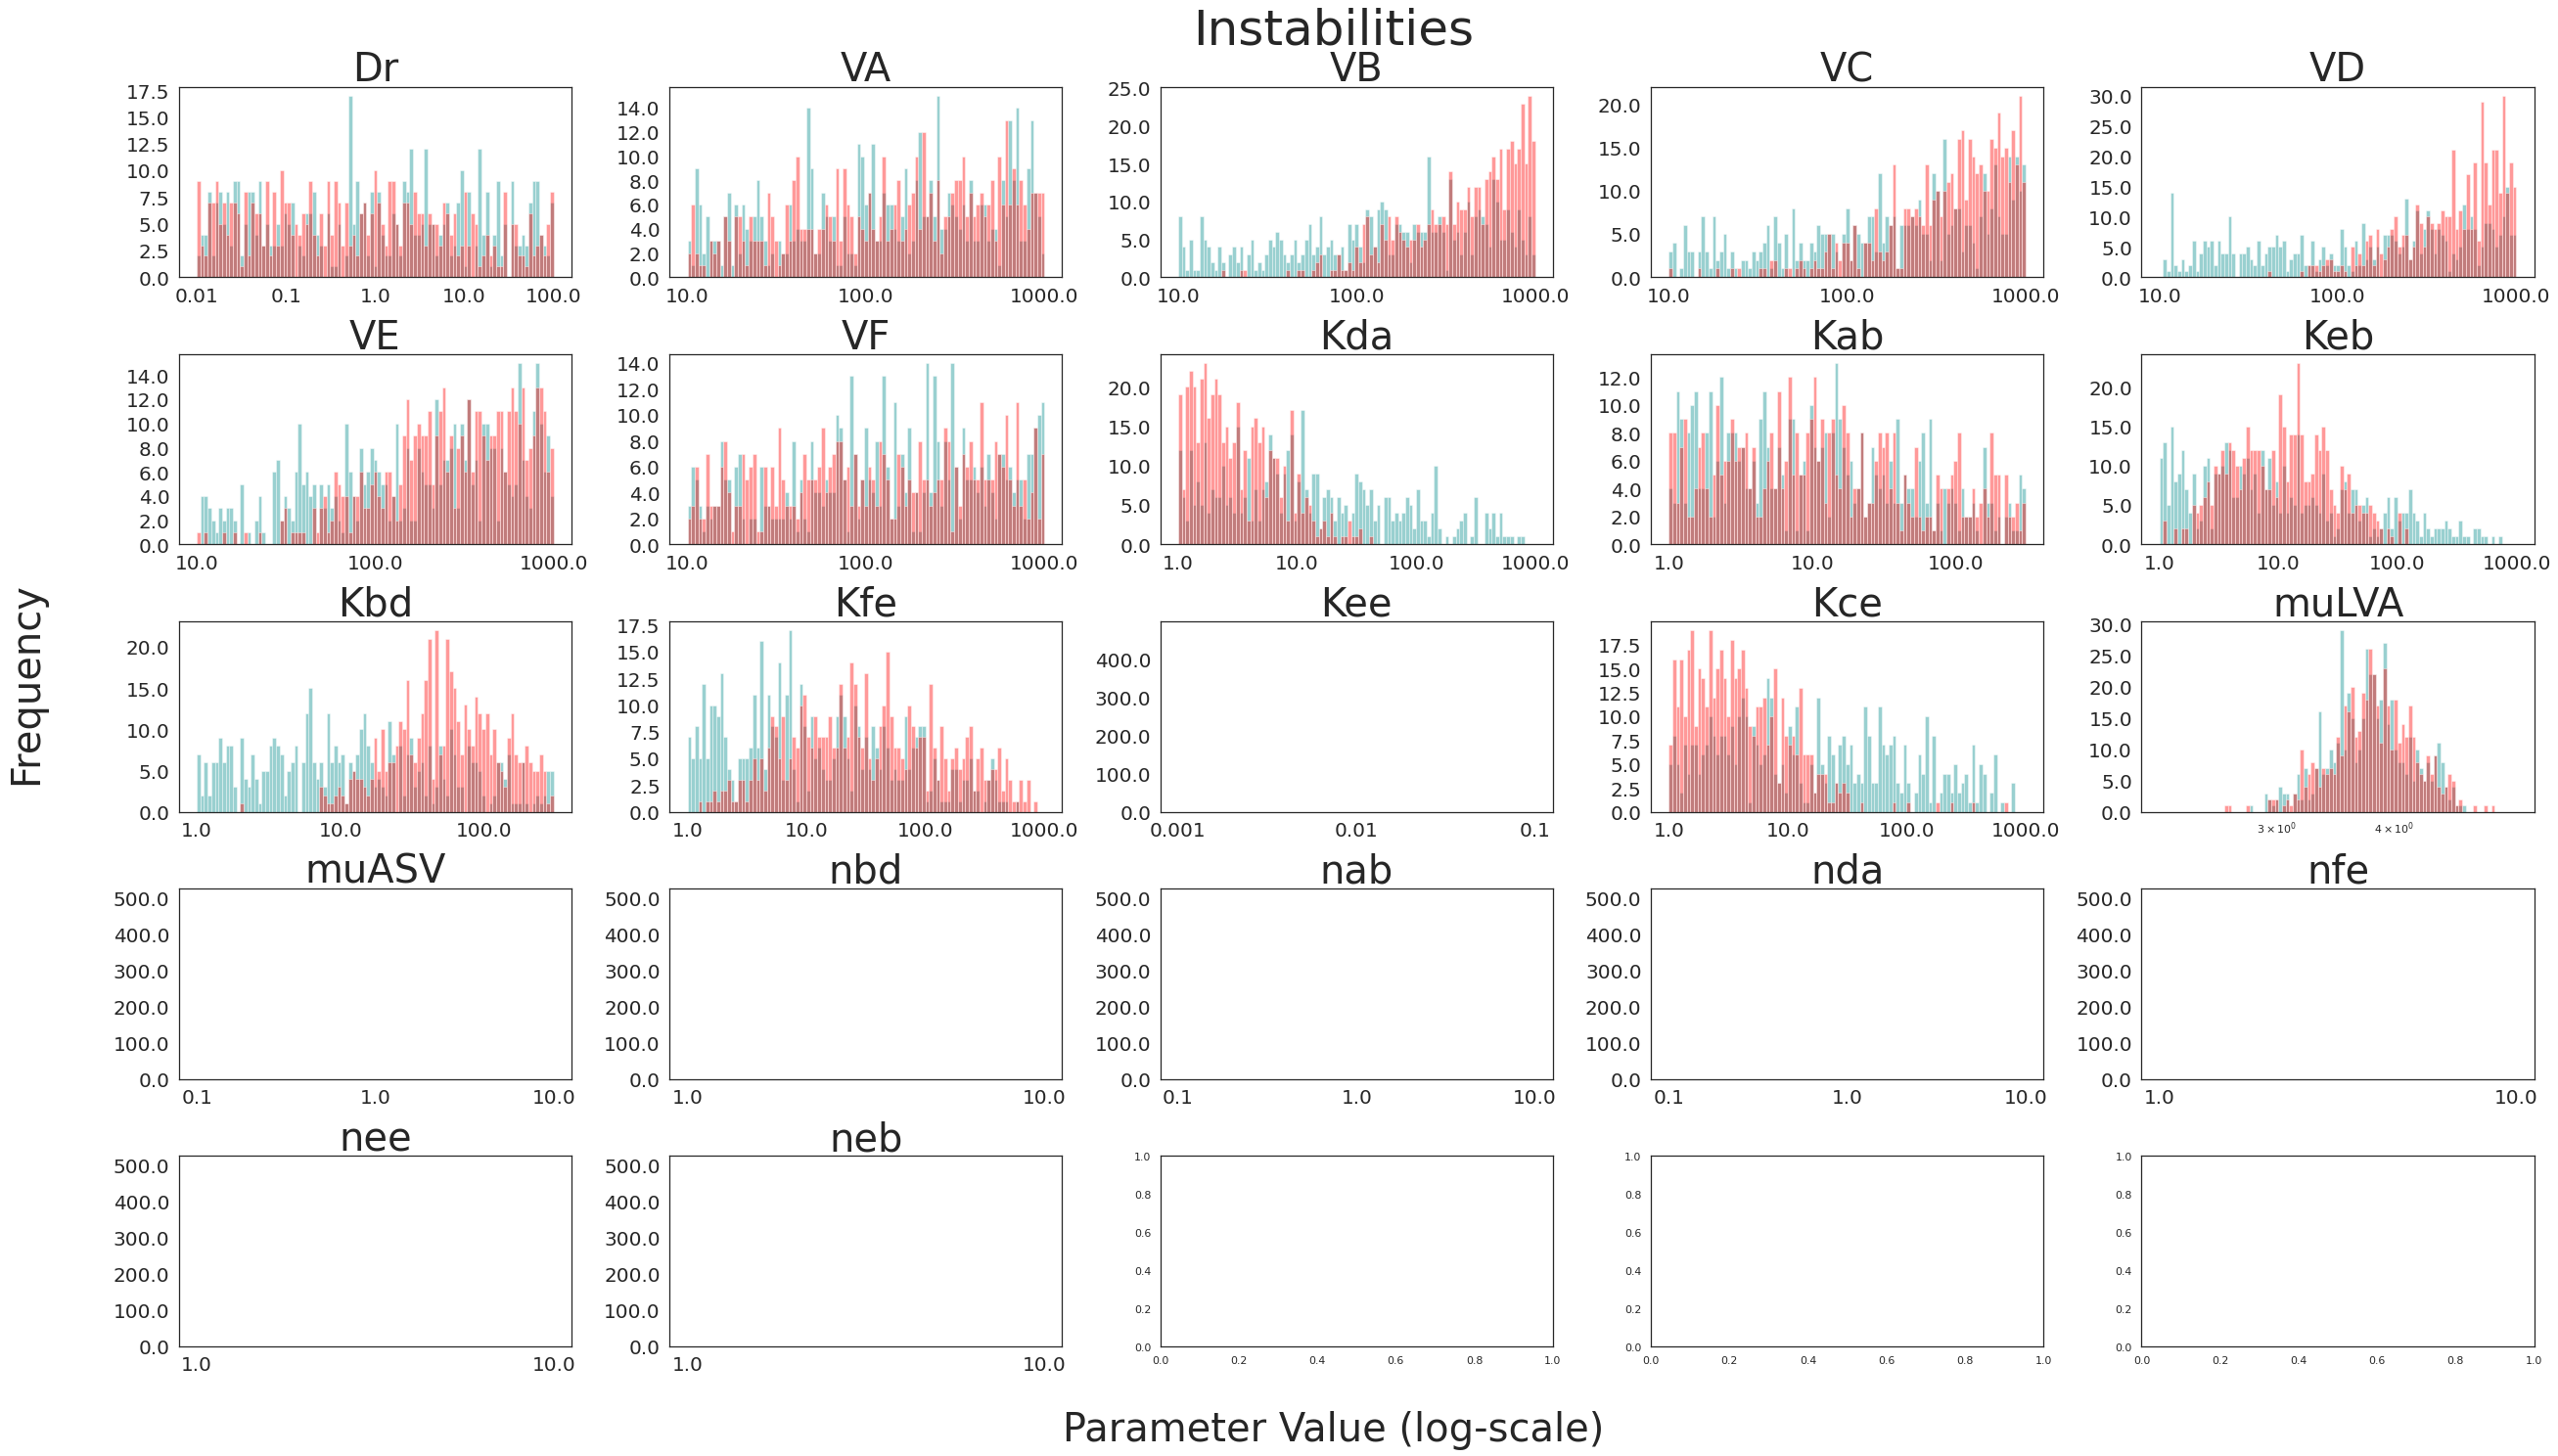

Dr 12.718796289286802
VA 243.41228203398853
VB 290.2316180056016
VC 327.10986248416555
VD 273.1961468570327
VE 276.6427053767547
VF 278.48564588532207
Kda 53.67591161105759
Kab 29.95197688118805
Keb 45.098166282739996
Kbd 40.99481199538001
Kfe 44.694029263409774
Kee 0.010000000000000007
Kce 80.54648727450862
muLVA 3.743428452858412
muASV 1.0
nbd 2.0
nab 1.0
nda 1.0
nfe 4.0
nee 4.0
neb 4.0


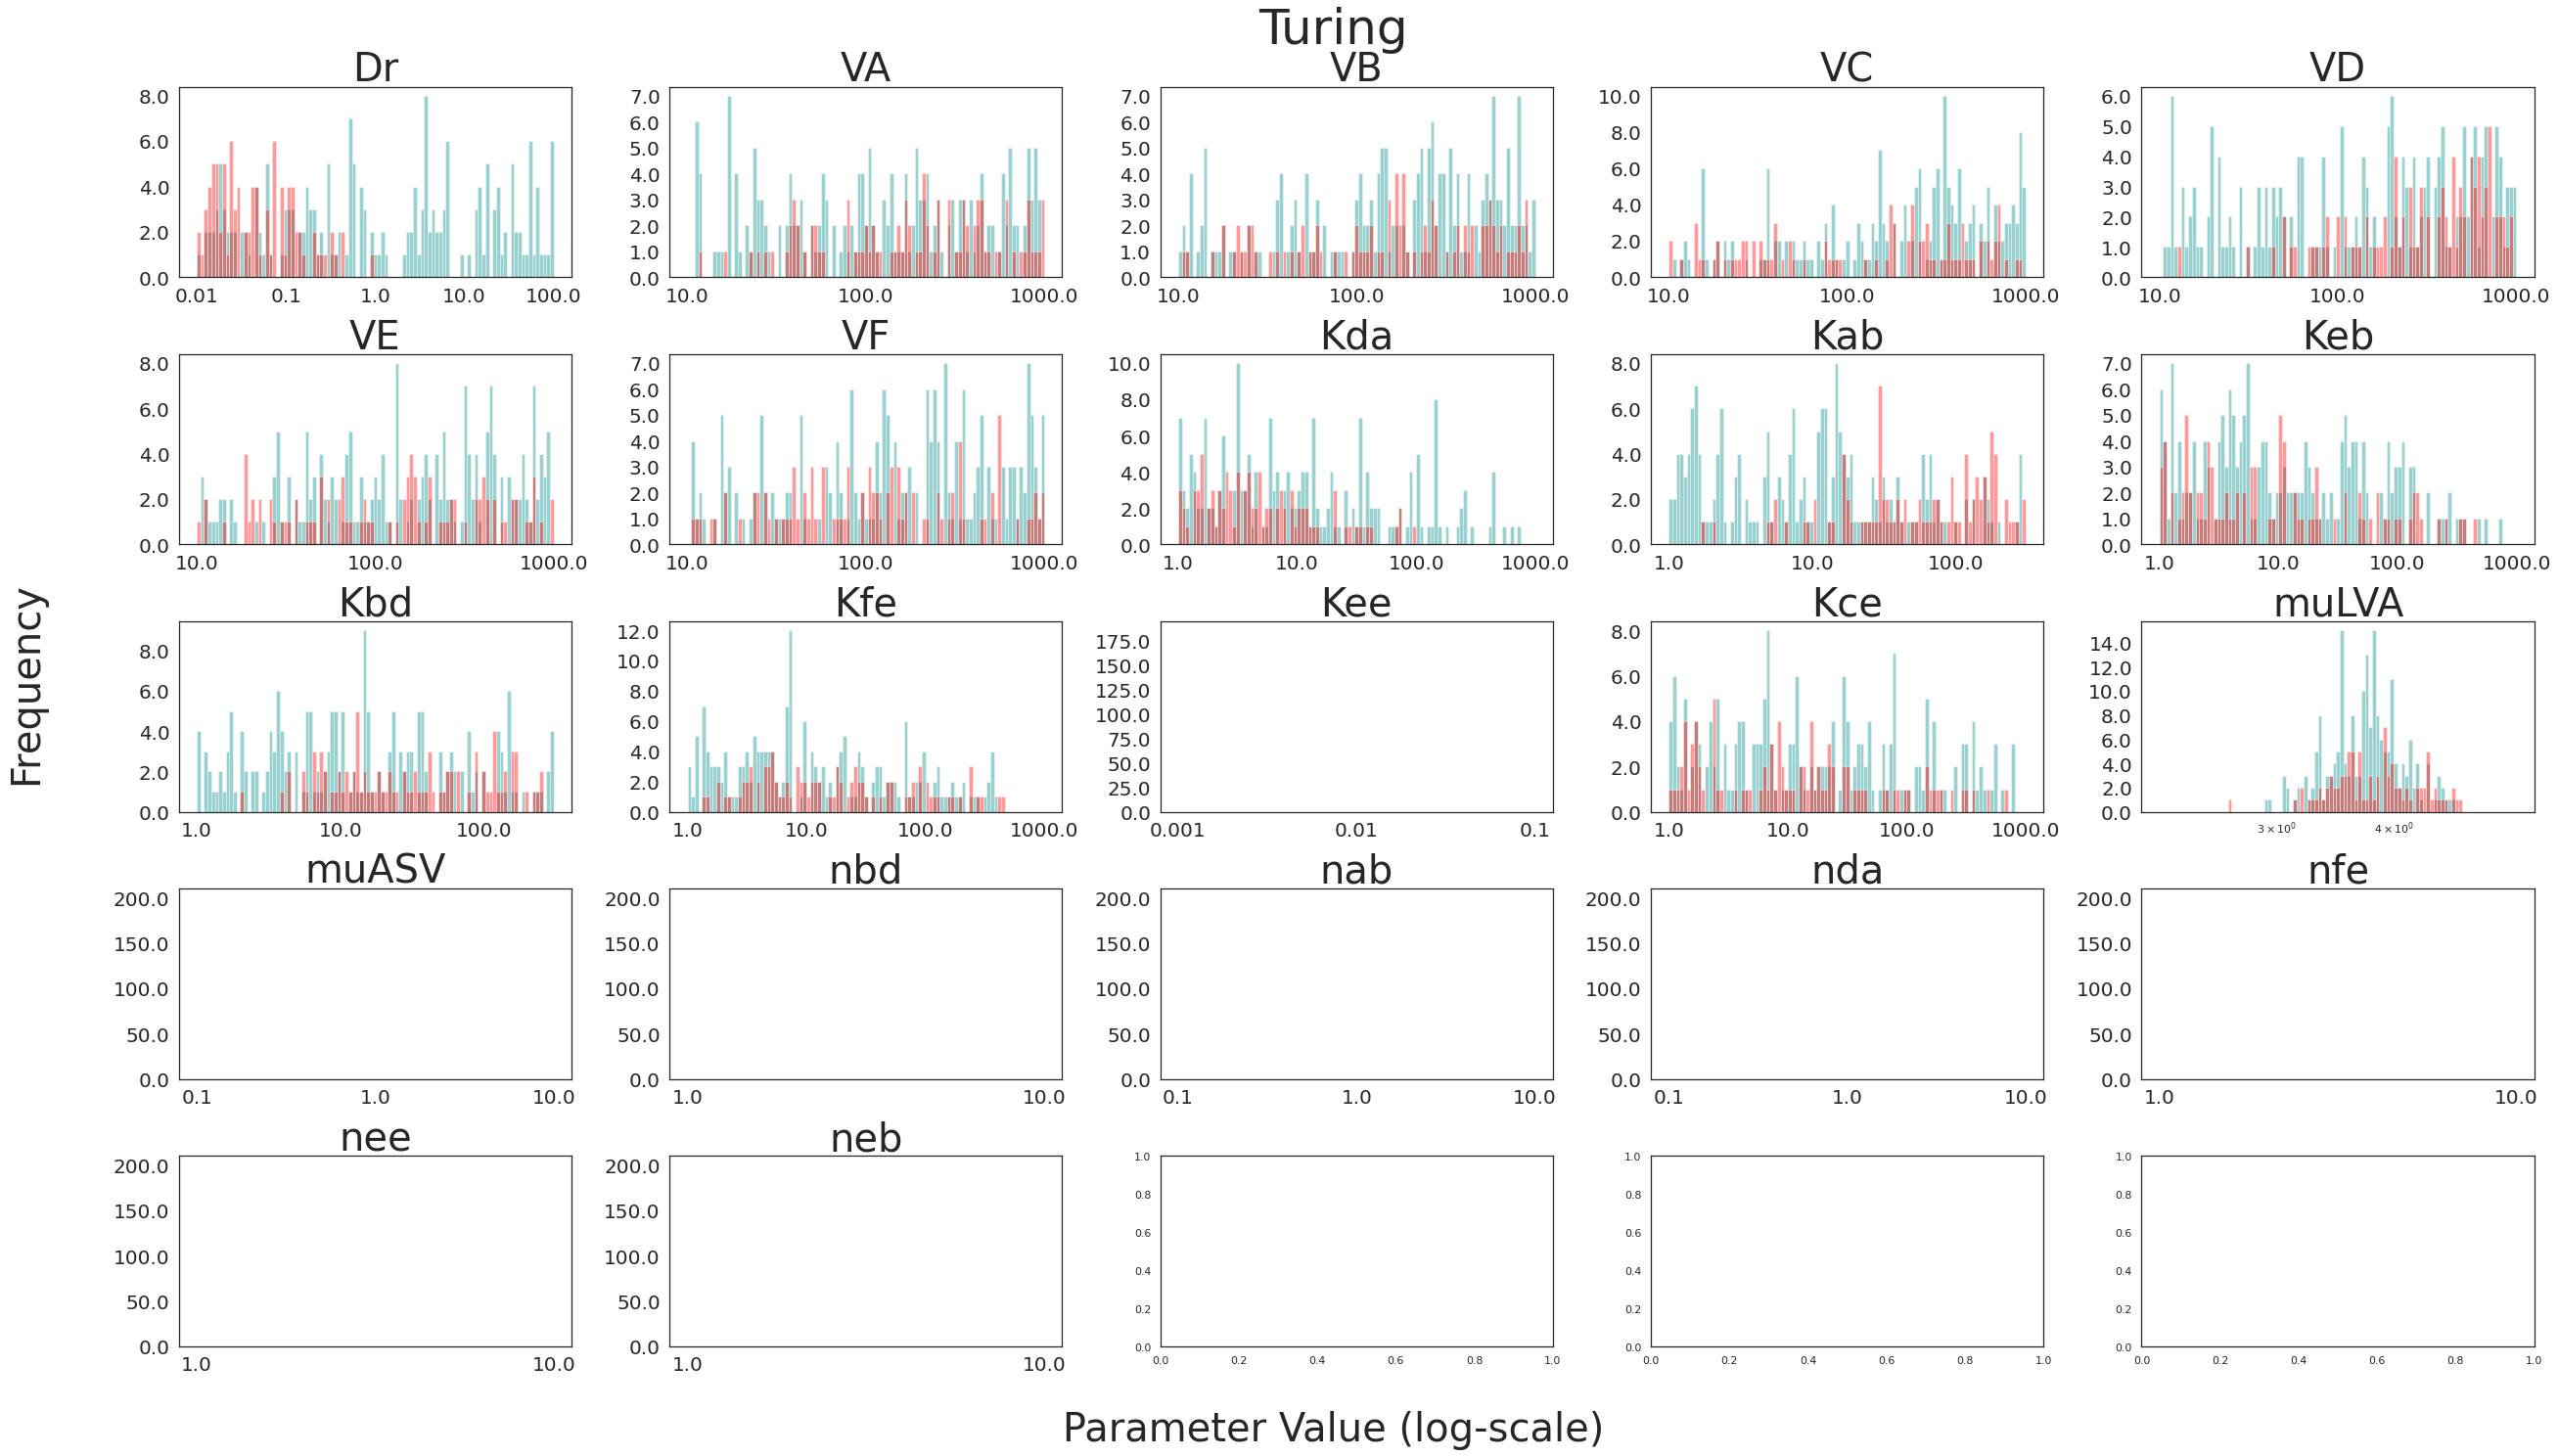

In [12]:
def paramsHistogram(generalDf,specificDf,title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(35,20))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    paramList = ['Dr', 'Va', 'Vb', 'Vc', 'Vd', 'Ve', 'Vf', 'Kub', 'Keb', 'Kee', 'Kvd',
       'Kda', 'Kce', 'Kfe', 'muLVA']
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kub', 'Keb', 'Kvd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    for count, parameter in enumerate(generalDf.columns[:23]):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        LogMin, LogMax = np.log10(generalDf.iloc[:,count].min()),np.log10(generalDf.iloc[:,count].max())
        newBins = np.logspace(LogMin, LogMax,100)
        sns.distplot(generalDf.iloc[:crop,count].values,bins=newBins, kde=False,color = 'darkcyan', ax = axs[count])
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count])
        print(parameter, np.mean(generalDf.iloc[:crop,count]))

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)

        axs[count].set_title(str(parameter),fontsize=40)
    #     axs[count].set_xlim(0)
    fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
    plt.show()

paramsHistogram(lsa_df,instabilities_df, 'Instabilities',crop=500)
# paramsHistogram(lsa_df,turing_df, 'Turing',crop=200)
paramsHistogram(lsa_df,turing_df, 'Turing',crop=200)
# paramsHistogram(lsa_df,zeroSignChanges_df, 'Diffusion independent stability',crop=2000)



In [17]:
print(zeroSignChanges_df['muLVA'])

22      2    3.767555
61      2     3.38203
69      2     4.07284
82      2     4.12832
156     0    4.209076
               ...   
999898  2    4.232196
999914  2    3.106017
999969  2    3.358294
999980  1    3.849816
999988  2    4.157602
Name: muLVA, Length: 33980, dtype: object


In [18]:

def plotDist(parameterDictList,lhsDist_df):
    nvar = len(parameterDictList)
  
    fig,axs = plt.subplots(nrows=1,ncols=nvar,figsize=(nvar*5,5))
    for count,parameter in enumerate(parameterDictList):
        name = parameter['name']
        lhsDistColumn = lhsDist_df[name]
        sns.histplot(lhsDistColumn, ax=axs[count], bins=100)
        axs[count].set(ylabel ='',yticks=[],yticklabels=[])
        axs[count].set_xlabel(name, fontsize=15)
        # axs[count].set_xscale('log')
    plt.show()